In [1]:
import os 
import numpy as np
import pandas as pd
import itertools 
import matplotlib.pyplot as plt
import seaborn as sns

network_param_scenarios = ["Baseline (20 % Discount)", "33 % Discount"]
surge_scenarios = ["wind", "solar", "wind+solar"]

title_size = 16
ax_size=14

n_days = 10
main_save_dir = f"./surge_results_{n_days}"

univariate_surge = [0.1, 0.5, 0.7, 1.0, 1.2, 1.7, 2.0]

bivariate_surge = itertools.product([1.2, 1.5, 2.5], [0.1, 0.3, 0.7])

all_data = []
for scenario in surge_scenarios:
    for network_param_scenario in network_param_scenarios:
#         save_dir = f"{main_save_dir}/{network_param_scenario}/{scenario}"
        save_dir = f"{main_save_dir}/{scenario}/{network_param_scenario}"
        data_file_pth= f"{save_dir}/results.csv"
        if os.path.exists(data_file_pth):
            surge_data = pd.read_csv(data_file_pth, index_col=0)
            all_data.append(surge_data)
surge_res = pd.concat(all_data)

n_days = 30
main_save_dir = f"./surge_results_{n_days}"

all_data = []
for scenario in surge_scenarios:
    for network_param_scenario in network_param_scenarios:
#         save_dir = f"{main_save_dir}/{network_param_scenario}/{scenario}"
        save_dir = f"{main_save_dir}/{scenario}/{network_param_scenario}"
        data_file_pth= f"{save_dir}/results.csv"
        if os.path.exists(data_file_pth):
            surge_data = pd.read_csv(data_file_pth, index_col=0)
            all_data.append(surge_data)
surge_res_30 = pd.concat(all_data)

In [2]:
surge_res

,Optimum,Solar Surge Factor,Wind Surge Factor,Network Parameter Scenario,Surge Scenario
0,310.344828,1.0,0.1,Baseline (20 % Discount),wind
1,347.000000,1.0,0.5,Baseline (20 % Discount),wind
2,385.000000,1.0,0.7,Baseline (20 % Discount),wind
3,431.000000,1.0,1.0,Baseline (20 % Discount),wind
4,441.000000,1.0,1.2,Baseline (20 % Discount),wind
5,344.827586,1.0,1.7,Baseline (20 % Discount),wind
6,321.000000,1.0,2.0,Baseline (20 % Discount),wind
0,583.000000,1.0,0.1,33 % Discount,wind
1,634.000000,1.0,0.5,33 % Discount,wind
2,691.000000,1.0,0.7,33 % Discount,wind


Text(0, 0.5, 'Opt Num Batteries')

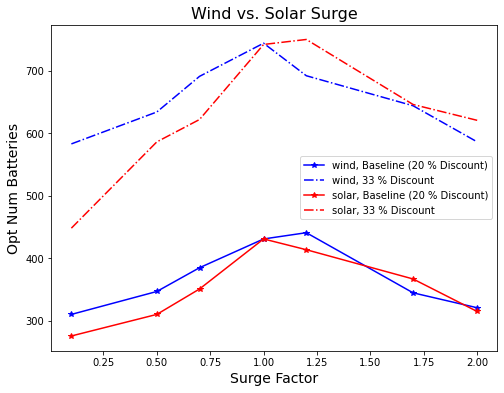

In [3]:
fig, ax = plt.subplots(figsize=(8,6))
for surge_scenario in ["wind", "solar"]: 
    for network_scenario in network_param_scenarios: 
        sub_df = surge_res.loc[surge_res["Surge Scenario"] == surge_scenario]
        sub_df = sub_df.loc[sub_df["Network Parameter Scenario"] == network_scenario]
        opt = list(sub_df["Optimum"])
        if surge_scenario == "wind": 
            color = "blue"
        else: color = "red"
        if "Baseline" in network_scenario:
            symbol = '-*'
        else: symbol = "-."
        ax.plot(univariate_surge, opt,symbol,color=color,label=f"{surge_scenario}, {network_scenario}")
ax.legend()
ax.set_title(f"Wind vs. Solar Surge",fontsize=title_size) 
ax.set_xlabel("Surge Factor",fontsize=ax_size)
ax.set_ylabel("Opt Num Batteries",fontsize=ax_size)

In [4]:
sub_df

,Optimum,Solar Surge Factor,Wind Surge Factor,Network Parameter Scenario,Surge Scenario
0,448.275862,0.1,1.0,33 % Discount,solar
1,586.206897,0.5,1.0,33 % Discount,solar
2,622.000000,0.7,1.0,33 % Discount,solar
3,742.000000,1.0,1.0,33 % Discount,solar
4,750.000000,1.2,1.0,33 % Discount,solar
5,646.000000,1.7,1.0,33 % Discount,solar
6,620.689655,2.0,1.0,33 % Discount,solar


In [5]:
# fig, ax = plt.subplots(figsize=(8,6))
# joint_wind_vals = [1.2, 1.5, 2.5]
# joint_solar_vals = [0.1, 0.3, 0.7]
# for surge_scenario in ["wind+solar"]: 
#     for network_scenario in ["Baseline (20 % Discount)"]:#network_param_scenarios: 
#         sub_df = surge_res.loc[surge_res["Surge Scenario"] == surge_scenario]
#         sub_df = sub_df.loc[sub_df["Network Parameter Scenario"] == network_scenario]
#         opt = list(sub_df["Optimum"])
#         if surge_scenario == "wind": 
#             color = "blue"
#         else: color = "red"
#         if "Baseline" in network_scenario:
#             symbol = '-*'
#         else: symbol = "-."
#         ax.plot(univariate_surge, opt,symbol,color=color,label=f"{surge_scenario}, {network_scenario}")
# ax.legend()
# ax.set_title(f"Wind vs. Solar Surge",fontsize=title_size) 
# ax.set_xlabel("Surge Factor",fontsize=ax_size)
# ax.set_ylabel("Opt Num Batteries",fontsize=ax_size)

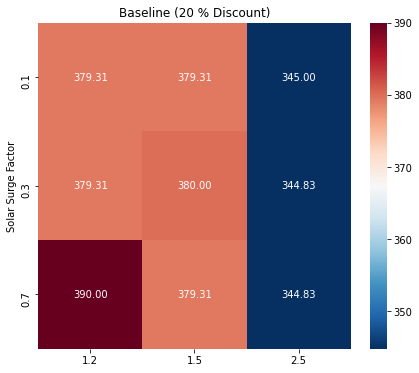

In [14]:
fig, ax = plt.subplots(figsize=(7,6))

sub_df = surge_res_30.loc[surge_res_30["Surge Scenario"] == "wind+solar"]
network_scenario = "Baseline (20 % Discount)"
sub_df = sub_df.loc[sub_df["Network Parameter Scenario"] == network_scenario]
show_df = sub_df.drop(["Network Parameter Scenario", "Surge Scenario"],axis=1)
x = "Wind Surge Factor"
y = "Solar Surge Factor"
color = "Optimum"
show_df = show_df.pivot(index=y, columns=x, values=color)
sns.heatmap(data=show_df,cmap="RdBu_r",annot=True, fmt=".2f",ax=ax)
ax.set_xlabel("")
ax.set_title(network_scenario)

plt.savefig("joint_surge_single.png")

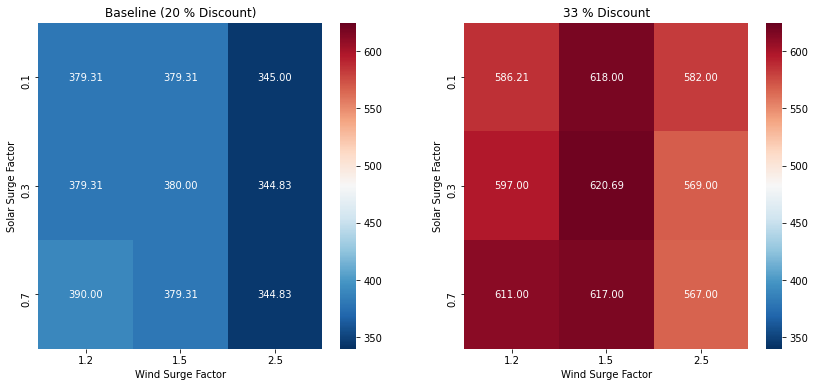

In [25]:
fig, axes = plt.subplots(1,2,figsize=(14,6))

vmin=340
vmax=625

ax = axes[0]
sub_df = surge_res_30.loc[surge_res_30["Surge Scenario"] == "wind+solar"]
network_scenario = "Baseline (20 % Discount)"
sub_df = sub_df.loc[sub_df["Network Parameter Scenario"] == network_scenario]
show_df = sub_df.drop(["Network Parameter Scenario", "Surge Scenario"],axis=1)
x = "Wind Surge Factor"
y = "Solar Surge Factor"
color = "Optimum"
show_df = show_df.pivot(index=y, columns=x, values=color)
sns.heatmap(data=show_df,cmap="RdBu_r",annot=True, fmt=".2f",ax=ax, vmin=vmin, vmax=vmax)
# ax.set_xlabel("")
ax.set_title(network_scenario)
ax=axes[1]
sub_df = surge_res_30.loc[surge_res_30["Surge Scenario"] == "wind+solar"]
network_scenario = "33 % Discount"
sub_df = sub_df.loc[sub_df["Network Parameter Scenario"] == network_scenario]
show_df = sub_df.drop(["Network Parameter Scenario", "Surge Scenario"],axis=1)
x = "Wind Surge Factor"
y = "Solar Surge Factor"
color = "Optimum"
ax.set_title(network_scenario)
show_df = show_df.pivot(index=y, columns=x, values=color)
sns.heatmap(data=show_df,cmap="RdBu_r",annot=True, fmt=".2f",ax=ax, vmin=vmin, vmax=vmax)
plt.savefig("joint_surge.png")

In [8]:
# surge_scenarios = surge_scenarios = ["wind", "solar"]
# feature_types = ["FBK", "MFCC"]

# fig, axes = plt.subplots(1, 3, figsize=(14,6))
# fig.suptitle(f"Interaction of Feature Type and Context Width", fontsize=title_size + 3)

# ctxt_widths = sorted(set(ctxt_df["Context Width"]))

# for idx, coeff in enumerate(coefficients):
#     ax = axes[idx]
#     for feature_type in feature_types: 
#         rep_name = f"{feature_type} {coeff}"
#         show_df = ctxt_df.loc[ctxt_df["Feature Type"] == rep_name]
        
#         if feature_type == "FBK":
#             test_color = "red"
#             train_color = "orange"
#         else: 
#             test_color = "blue"
#             train_color = "green"
        
#         test_err = show_df.loc[show_df["Evaluation Data"] == "Testing Set"][err_label]
#         ax.plot(ctxt_widths, test_err,'-*',color=test_color,label=f"{feature_type} (Test)")
        
#         train_err = show_df.loc[show_df["Evaluation Data"] == "Training Set"][err_label]
#         ax.plot(ctxt_widths, train_err,'-.',color=train_color,label=f"{feature_type} (Train)")

#         ax.legend(loc="upper right")
        
#         ax.set_title(f"{coeff} Coefficients",fontsize=title_size) 
#         ax.set_xlabel("Context Width",fontsize=ax_size)
#         ax.set_ylabel(err_label,fontsize=ax_size)
        
# plt.savefig(f"{output_dir}ctxt_features.png", dpi=400, bbox_inches="tight")      

In [9]:
surge_res_30

,Optimum,Solar Surge Factor,Wind Surge Factor,Network Parameter Scenario,Surge Scenario
0,344.827586,1.0,0.1,Baseline (20 % Discount),wind
1,379.310345,1.0,0.5,Baseline (20 % Discount),wind
2,413.793103,1.0,0.7,Baseline (20 % Discount),wind
3,424.000000,1.0,1.0,Baseline (20 % Discount),wind
4,448.275862,1.0,1.2,Baseline (20 % Discount),wind
5,392.000000,1.0,1.7,Baseline (20 % Discount),wind
6,380.000000,1.0,2.0,Baseline (20 % Discount),wind
0,620.689655,1.0,0.1,33 % Discount,wind
1,620.689655,1.0,0.5,33 % Discount,wind
2,655.172414,1.0,0.7,33 % Discount,wind


Text(0, 0.5, 'Total Capacity')

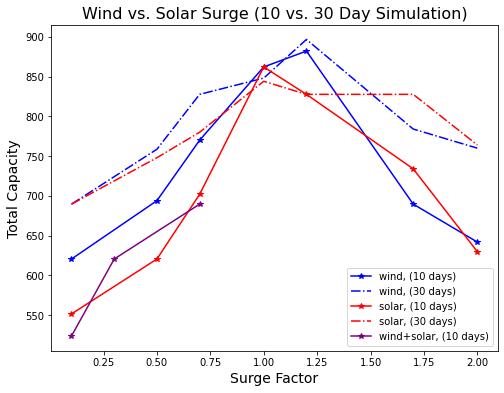

In [27]:
fig, ax = plt.subplots(figsize=(8,6))
network_scenario = "Baseline (20 % Discount)"
joint_wind_vals = [1.2, 1.5, 2.5]
joint_solar_vals = [0.1, 0.3, 0.7]
for surge_scenario in ["wind", "solar","wind+solar"]: 
    for n_days in [10,30]: 
        if n_days == 10: show_df = surge_res
        else: 
            if surge_scenario == "wind+solar": continue
            show_df = surge_res_30
        sub_df = show_df.loc[show_df["Surge Scenario"] == surge_scenario]
        sub_df = sub_df.loc[sub_df["Network Parameter Scenario"] == network_scenario]
        if surge_scenario == "wind": 
            if n_days == 10: 
                color = "blue"
            else: color = "blue"#"green"
        elif surge_scenario == "solar": 
            if n_days == 10: 
                color = "red"
            else: color = "red"#"orange"
        else: 
            color = "purple"
                
        if n_days == 10: 
            symbol = '-*'
        else: symbol = "-."
            
        if surge_scenario == "wind+solar": 
            sub_df = sub_df.loc[sub_df["Wind Surge Factor"] == 1.5]
            ax.plot(joint_solar_vals, np.array(sub_df["Optimum"])*2,symbol,color=color,label=f"{surge_scenario}, ({n_days} days)")
        else: 
            ax.plot(univariate_surge, np.array(sub_df["Optimum"])*2,symbol,color=color,label=f"{surge_scenario}, ({n_days} days)")
ax.legend()
ax.set_title(f"Wind vs. Solar Surge (10 vs. 30 Day Simulation)",fontsize=title_size) 
ax.set_xlabel("Surge Factor",fontsize=ax_size)
ax.set_ylabel("Total Capacity",fontsize=ax_size)

In [33]:
w = "wind"
w.capitalize()

'Wind'

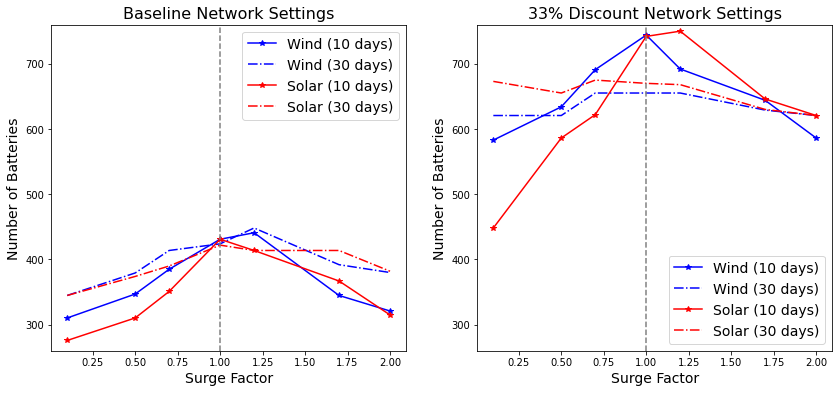

In [39]:
fig, axes = plt.subplots(1, 2, figsize=(14,6))
# fig.suptitle('Measuring Network Robustness to Wind and Solar Supply Variability', fontsize=title_size + 3)

show_scenarios = ["wind", "solar"]
y_min = 260
y_max = 760

ax = axes[0]

capacity_scale = 1 # set to 2 if showing opt tot capacity instead of num batteries
legend_text_size = 14

network_scenario = "Baseline (20 % Discount)"
joint_wind_vals = [1.2, 1.5, 2.5]
joint_solar_vals = [0.1, 0.3, 0.7]
for surge_scenario in show_scenarios: 
    for n_days in [10,30]: 
        if n_days == 10: show_df = surge_res
        else: 
            if surge_scenario == "wind+solar": continue
            show_df = surge_res_30
        sub_df = show_df.loc[show_df["Surge Scenario"] == surge_scenario]
        sub_df = sub_df.loc[sub_df["Network Parameter Scenario"] == network_scenario]
        if surge_scenario == "wind": 
            if n_days == 10: 
                color = "blue"
            else: color = "blue"#"green"
        elif surge_scenario == "solar": 
            if n_days == 10: 
                color = "red"
            else: color = "red"#"orange"
        else: 
            color = "purple"
                
        if n_days == 10: 
            symbol = '-*'
        else: symbol = "-."
            
        if surge_scenario == "wind+solar": 
            sub_df = sub_df.loc[sub_df["Wind Surge Factor"] == 1.5]
            ax.plot(joint_solar_vals, np.array(sub_df["Optimum"])*capacity_scale,symbol,color=color,label=f"{surge_scenario.capitalize()} ({n_days} days)")
        else: 
            ax.plot(univariate_surge, np.array(sub_df["Optimum"])*capacity_scale,symbol,color=color,label=f"{surge_scenario.capitalize()} ({n_days} days)")
ax.legend(prop={'size': legend_text_size})
ax.set_title(f"Baseline Network Settings",fontsize=title_size) 
ax.set_xlabel("Surge Factor",fontsize=ax_size)
ax.set_ylabel("Number of Batteries",fontsize=ax_size)
ax.axvline(x=1.0,color='gray', linestyle='--')
ax.set_ylim([y_min,y_max])

ax = axes[1]
network_scenario = "33 % Discount"
joint_wind_vals = [1.2, 1.5, 2.5]
joint_solar_vals = [0.1, 0.3, 0.7]
for surge_scenario in show_scenarios: 
    for n_days in [10,30]: 
        if n_days == 10: show_df = surge_res
        else: 
            if surge_scenario == "wind+solar": continue
            show_df = surge_res_30
        sub_df = show_df.loc[show_df["Surge Scenario"] == surge_scenario]
        sub_df = sub_df.loc[sub_df["Network Parameter Scenario"] == network_scenario]
        if surge_scenario == "wind": 
            if n_days == 10: 
                color = "blue"
            else: color = "blue"#"green"
        elif surge_scenario == "solar": 
            if n_days == 10: 
                color = "red"
            else: color = "red"#"orange"
        else: 
            color = "purple"
                
        if n_days == 10: 
            symbol = '-*'
        else: symbol = "-."
            
        if surge_scenario == "wind+solar": 
            sub_df = sub_df.loc[sub_df["Wind Surge Factor"] == 1.5]
            ax.plot(joint_solar_vals, np.array(sub_df["Optimum"])*capacity_scale,symbol,color=color,label=f"{surge_scenario.capitalize()} ({n_days} days)")
        else: 
            ax.plot(univariate_surge, np.array(sub_df["Optimum"])*capacity_scale,symbol,color=color,label=f"{surge_scenario.capitalize()} ({n_days} days)")
ax.legend(loc="lower right", prop={'size': legend_text_size})
ax.set_title(f"33% Discount Network Settings",fontsize=title_size) 
ax.set_xlabel("Surge Factor",fontsize=ax_size)
ax.set_ylabel("Number of Batteries",fontsize=ax_size)
ax.set_ylim([y_min,y_max])
ax.axvline(x=1.0,color='gray', linestyle='--')
plt.savefig("surge.png",dpi=400)



In [21]:
# fig, axes = plt.subplots(1, 3, figsize=(20,6))
# fig.suptitle('TDNN: Interplay of Feature Type, Context Width, and Num Nodes', fontsize=title_size + 3)

# for idx, coeff in enumerate(deltas): 
#     ax = axes[idx]
#     show_df = tdnn_df_test
#     show_df = show_df.loc[show_df["TDNN Type"] != "resnet_tdnn"]
#     show_df = show_df.loc[show_df["Coefficient Type"] == coeff]

#     x = "Num Nodes"
#     y = "Context Widths"
#     color = err_label
#     # pandas/seaborn plot help from: https://stackoverflow.com/questions/37790429/seaborn-heatmap-using-pandas-dataframe
#     # trgt_setting = "xwtri"
#     result = show_df.pivot(index=y, columns=x, values=color)
#     sns.heatmap(data=result, cmap="RdBu", annot=True, fmt=".2f",ax=ax, vmin=20.5, vmax=27.5)
#     ax.set_xlabel(x, fontsize=ax_size)
#     if idx == 0: ax.set_ylabel("", fontsize=ax_size)
#     ax.set_title(f"{coeff} Coefficients", fontsize=title_size)
    
# plt.savefig(f"{output_dir}tdnn_vary_ctxt.png", dpi=400, bbox_inches="tight")   

In [ ]:
# fig, axes = plt.subplots(1, 2, figsize=(14,6))
# fig.suptitle('TDNN Front-Ends for Phone Recognition', fontsize=title_size + 3)
# ax = axes[0]

# show_df = tdnn_df
# show_df = show_df.loc[show_df["TDNN Type"] != "resnet_tdnn"]
# show_df = show_df.loc[show_df["Context Widths"] == 7]
# show_df = show_df.loc[show_df["Num Nodes"] == 500]

# # update this w/ resnet vs. tdnn
# x = "Coefficient Type"
# hue = "Evaluation Data"
# y = err_label
# sns.barplot(x=x, y=y, hue = hue, data=show_df,ax=ax)
# ax.set_ylim([0, 30])
# ax.set_xlabel(x, fontsize=ax_size)
# ax.set_ylabel(err_label, fontsize=ax_size)
# for p in ax.patches:
#     ax.annotate(format(p.get_height(), '.1f') + "%", 
#                    (p.get_x() + p.get_width() / 2., p.get_height()), 
#                    ha = 'center', va = 'center', 
#                    xytext = (0, 9), 
#                    textcoords = 'offset points')
# ax.set_title("TDNN", fontsize=title_size)

# ax = axes[1]
# show_df = resnet_tdnn_df
# # update this w/ resnet vs. tdnn
# x = "Coefficient Type"
# hue = "Evaluation Data"
# y = err_label
# sns.barplot(x=x, y=y, hue = hue, data=show_df,ax=ax)
# ax.set_ylim([0, 30])
# ax.set_xlabel(x, fontsize=ax_size)
# ax.set_ylabel(err_label, fontsize=ax_size)
# for p in ax.patches:
#     ax.annotate(format(p.get_height(), '.1f') + "%", 
#                    (p.get_x() + p.get_width() / 2., p.get_height()), 
#                    ha = 'center', va = 'center', 
#                    xytext = (0, 9), 
#                    textcoords = 'offset points')
# ax.set_title("Resnet TDNN", fontsize=title_size)


# plt.savefig(f"{output_dir}tdnn_compare_features.png", dpi=400, bbox_inches="tight")


